In [1]:
library(ggplot2)
library(repr)
options(repr.plot.width=5, repr.plot.height=4)
rm(list=ls())

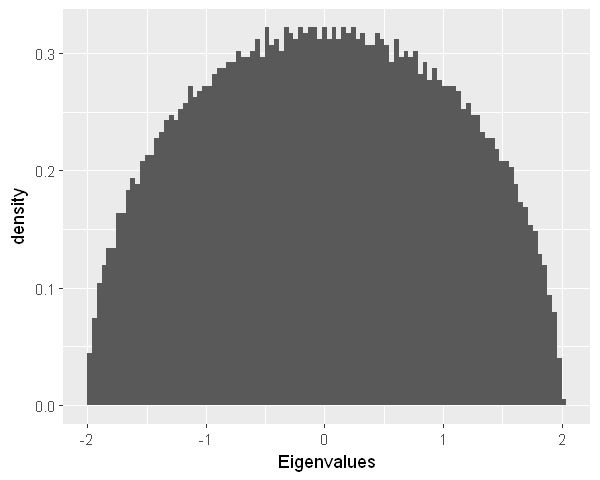

In [2]:
# Normal random symmetric matrix
n <- 5000
H <- array(rnorm(n^2), c(n,n))
Hs <- (H+t(H))/sqrt(2*n)
lamb <- eigen(Hs, symmetric=TRUE)$values

ggplot() +
    geom_histogram(aes(x=lamb, y=..density..), bins=100) +
    labs(x='Eigenvalues')

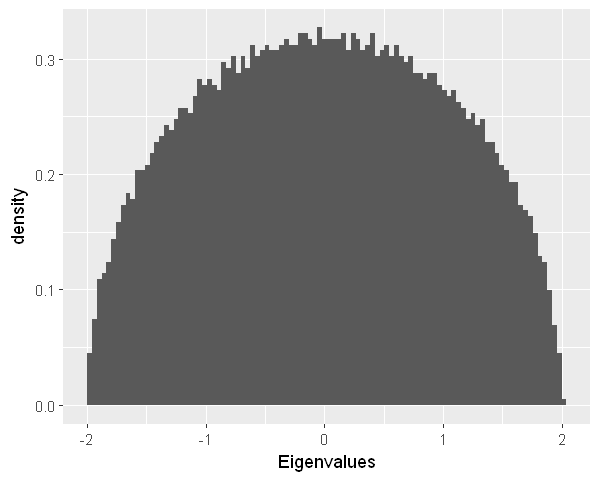

In [3]:
# Uniform random symmetric matrix
n <- 5000
H <- array(runif(n^2), c(n,n))
Hs <- sqrt(12)*(H+t(H)-1)/sqrt(2*n)
lamb <- eigen(Hs, symmetric=TRUE)$values

ggplot() +
    geom_histogram(aes(x=lamb, y=..density..), bins=100) +
    labs(x='Eigenvalues')

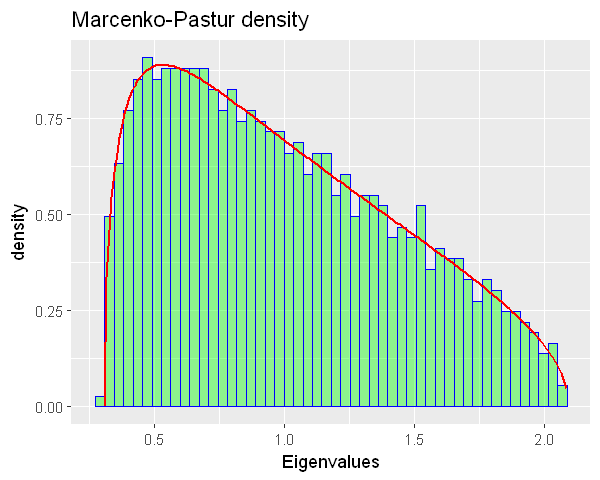

In [56]:
# IID random normal returns
T <- 5000
M <- 1000
H <- array(rnorm(M*T), c(M,T))
E <- H %*% t(H) / T
lamb <- eigen(E, symmetric=TRUE)$values

# Theoretical Distribution
f <- function(lamb){
    Q <- T/M
    sigma <- 1
    lamb.upper <- sigma*(1+1/sqrt(Q))^2
    lamb.lower <- sigma*(1-1/sqrt(Q))^2
    y <- Q/(2*pi*sigma^2)*sqrt((lamb.upper-lamb)*(lamb-lamb.lower))/lamb
    return(y)
}
Q <- T/M
sigma <- 1
lamb.upper <- sigma*(1+1/sqrt(Q))^2
lamb.lower <- sigma*(1-1/sqrt(Q))^2
x <- seq(lamb.lower,lamb.upper, by=0.01)
y <- f(x)

# Graph
ggplot() +
    geom_histogram(aes(x=lamb, y=..density..), bins=50 ,color='blue', fill='green', alpha=0.4) +
    geom_line(aes(x=x,y=y), color='red', size=0.8) + 
    labs(title='Marcenko-Pastur density', x='Eigenvalues')

In [72]:
# sampling error
M <- 431
T <- 2155
Q <- T/M
x <- 2/(M*(M-1))
(rho.max <- -qnorm(x)/sqrt(T))

[1] 0.09150516

[1] "Minimum eigenvalue : 0.12"
[1] "Maximum eigenvalue : 1.84"


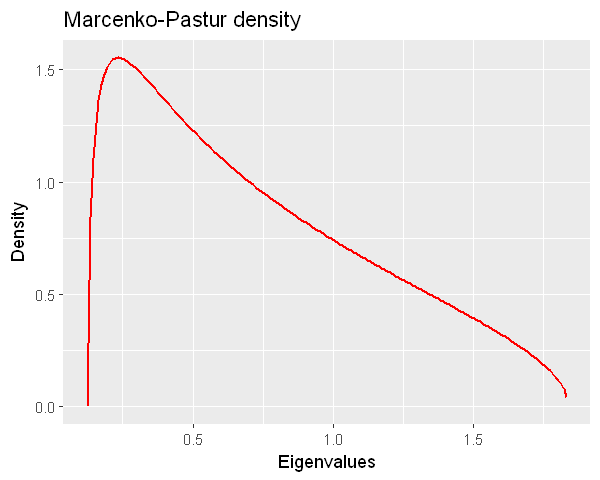

In [93]:
# A hand-waving practical approach
f <- function(lamb, sigma, Q){
    lamb.upper <- sigma*(1+1/sqrt(Q))^2
    lamb.lower <- sigma*(1-1/sqrt(Q))^2
    y <- Q/(2*pi*sigma^2)*sqrt((lamb.upper-lamb)*(lamb-lamb.lower))/lamb
    return(y)
}
Q <- 2.90
sigma <- 0.73
lamb.upper <- sigma*(1+1/sqrt(Q))^2
lamb.lower <- sigma*(1-1/sqrt(Q))^2
x <- seq(lamb.lower,lamb.upper, by=0.01)
y <- f(x, sigma, Q)

# Graph
ggplot() +
    geom_line(aes(x=x,y=y), color='red', size=0.8) + 
    labs(title='Marcenko-Pastur density', x='Eigenvalues', y='Density')
print(paste0("Minimum eigenvalue : ", round(lamb.lower,2)))
print(paste0("Maximum eigenvalue : ", round(lamb.upper,2)))